## 課題3.2

$$
f(y_n)=\frac{q}{m}(y_n \times \boldsymbol{B})
$$

In [1]:
using OffsetArrays
using LinearAlgebra
using LaTeXStrings
using Plots
pyplot(w=3, legend=false)

# parameter
const m = 1.
const q = 1.
const τ = 2π
B = [0.; 0.; 1.]

# v init
vinit(n_max::Int) = OffsetArray(hcat([0.; 1.; 0.], zeros(Float64, 3, n_max)), 1:3, 0:n_max)

# differential equation
diff(y_n::AbstractArray) = (y_n × B)q/m

# parameter
Δt = τ/64
n_max = Int(5τ/Δt)
v = vinit(n_max)

# locus
function locus(method!::Function, v::AbstractArray, n_max::Int, Δt::Float64, filename::String)
    vc = method!(v, n_max, Δt)
    plot!(vc[1, 0:n_max], vc[2, 0:n_max], aspect_ratio=1)
    savefig("img/$(filename).png")
    return
end

# time evolution
function timeevo(method!::Function, v::AbstractArray, n_max::Int, Δt::Float64, filename::String)
    vc = method!(v, n_max, Δt)
    eᵣ = map(n -> norm(vc[:,n] - [sin(Δt*n); cos(Δt*n); 0.]), 0:n_max)
    plot!((0:n_max)*Δt, eᵣ)
    savefig("img/$(filename).png")
    return
end

timeevo (generic function with 1 method)

### 課題3.2.1

## オイラー法

$$
y_{n+1}=y_n+f(x_n, y_n)h
$$

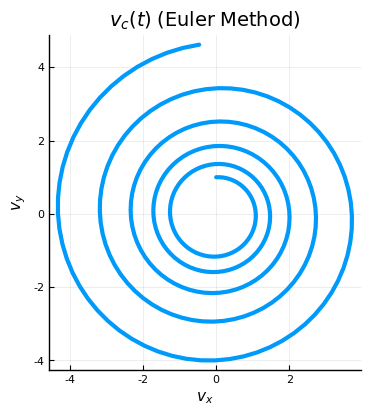

In [2]:
# Euler Method
function euler!(y::AbstractArray, n_max::Int, h::Float64)
    for n = 0:n_max-1
        y[:,n+1] = y[:,n] + diff(y[:,n])h
    end
    return y
end


plot(title=L"v_c(t) \; (\rm{Euler\;Method})", xlabel=L"v_x", ylabel=L"v_y")
locus(euler!, v, n_max, Δt, "3_2_1-a")

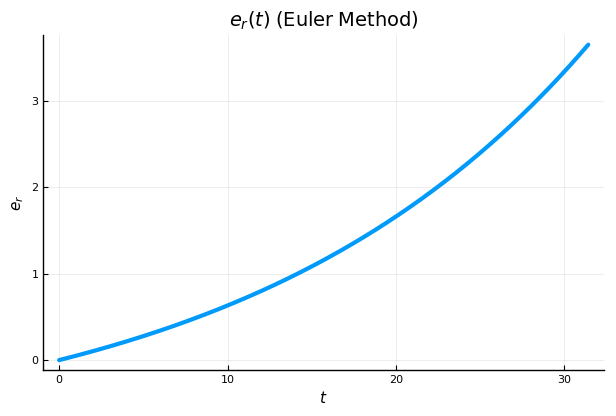

In [3]:
plot(title=L"e_r(t) \; (\rm{Euler\;Method})", xlabel=L"t", ylabel=L"e_r")
timeevo(euler!, v, n_max, Δt, "3_2_1-b")

### 課題3.2.3

## ホイン法

$$
y_{n+1} = y_n + \frac{1}{2}(k_1 + k_2)
$$

\begin{eqnarray}
k_1 &=& f(y_n)\Delta x \\
k_2 &=& f(y_n + k_1)\Delta x \\
\end{eqnarray}

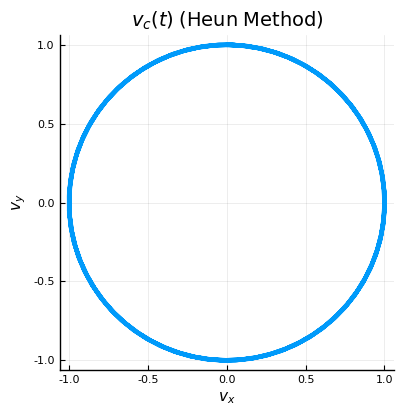

In [4]:
# Heun method
function heun!(y::AbstractArray, n_max::Int, Δx::Float64)
    for n = 0:n_max-1
        k₁ = diff(y[:,n])Δx
        k₂ = diff(y[:,n] + k₁)Δx
        y[:,n+1] = y[:,n] + (k₁+k₂)/2
    end
    return y
end

plot(title=L"v_c(t) \; (\rm{Heun\;Method})", xlabel=L"v_x", ylabel=L"v_y")
locus(heun!, v, n_max, Δt, "3_2_3-a")

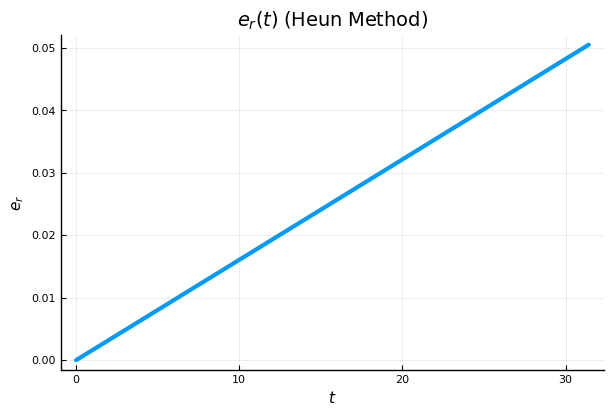

In [5]:
plot(title=L"e_r(t) \; (\rm{Heun\;Method})", xlabel=L"t", ylabel=L"e_r")
timeevo(heun!, v, n_max, Δt, "3_2_3-b")

### 課題3.2.4

## 4次のルンゲクッタ法(古典的ルンゲクッタ法)

$$
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

\begin{eqnarray}
k_1 &=& f(y_n)\Delta x \\
k_2 &=& f(y_n + \frac{k_1}{2})\Delta x \\
k_3 &=& f(y_n + \frac{k_2}{2})\Delta x \\
k_4 &=& f(y_n + k_3)\Delta x \\
\end{eqnarray}

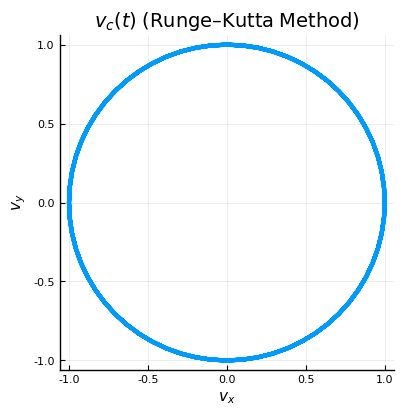

In [6]:
# the classical Runge–Kutta method
function RK4!(y::AbstractArray, n_max::Int, Δx::Float64)
    for n = 0:n_max-1
        k₁ = diff(y[:,n])Δx
        k₂ = diff(y[:,n] + k₁/2)Δx
        k₃ = diff(y[:,n] + k₂/2)Δx
        k₄ = diff(y[:,n] + k₃)Δx
        y[:,n+1] = y[:,n] + (k₁+2k₂+2k₃+k₄)/6
    end
    return y
end

plot(title=L"v_c(t) \; (\rm{Runge–Kutta\;Method})", xlabel=L"v_x", ylabel=L"v_y")
locus(RK4!, v, n_max, Δt, "3_2_4-a")

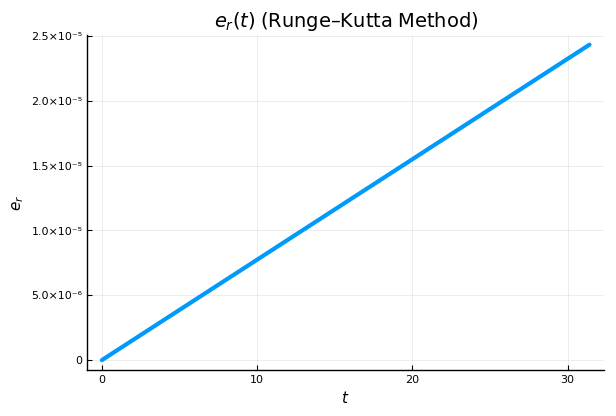

In [7]:
plot(title=L"e_r(t) \; (\rm{Runge–Kutta\;Method})", xlabel=L"t", ylabel=L"e_r")
timeevo(RK4!, v, n_max, Δt, "3_2_4-b")

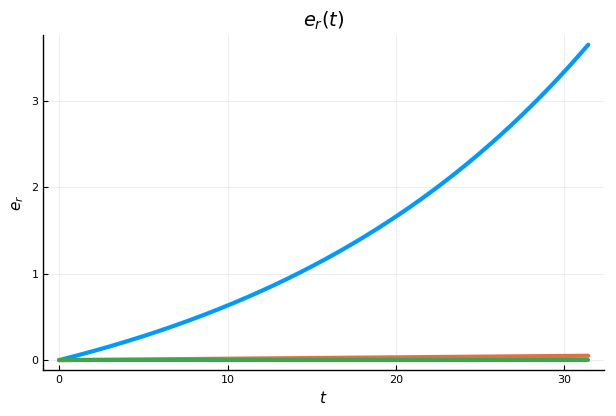

In [8]:
plot(title=L"e_r(t)", xlabel=L"t", ylabel=L"e_r")
timeevo(euler!, v, n_max, Δt, "3_2-b")
timeevo(heun!, v, n_max, Δt, "3_2-b")
timeevo(RK4!, v, n_max, Δt, "3_2-b")